# 🚀 Boosting Ensemble Demo on Noisy Synthetic Data

This notebook demonstrates **boosting** using AdaBoost, and XGBoost on noisy synthetic data.

Synth dataset docs: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

## 📥 Load and inspect data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
import seaborn as sns
import itertools


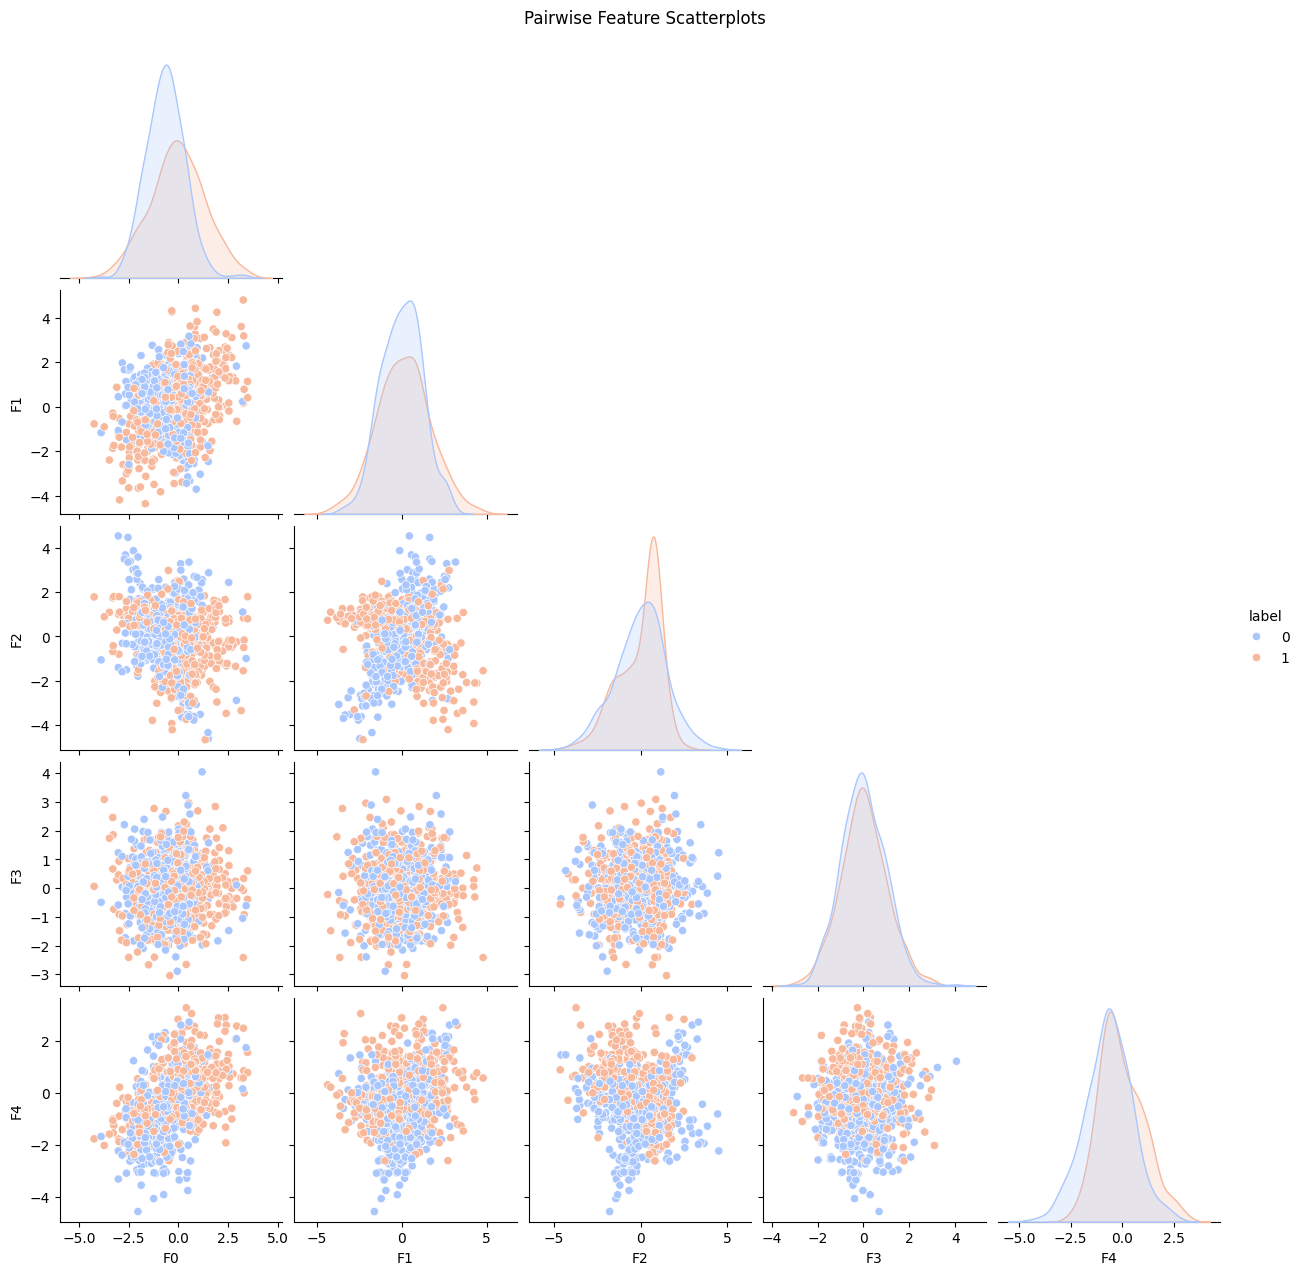

In [5]:
# Generate & visualize synthetic noisy classification dataset
X, y = make_classification(n_samples=1000, n_features=5, n_informative=4,
                           n_redundant=0, flip_y=0.2, class_sep=0.7, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# DataFrame for plotting
df = pd.DataFrame(X, columns=[f"F{i}" for i in range(X.shape[1])])
df["label"] = y

sns.pairplot(df, hue="label", corner=True, palette="coolwarm")
plt.suptitle("Pairwise Feature Scatterplots", y=1.02)
plt.show()

##  
## 🪵 Comparison: Stump vs DT vs AdaBoost
##  


In [6]:
def evaluate_model_cv(name, model, X, y):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"{name:20s} Mean Acc: {scores.mean():.3f} | Std: {scores.std():.3f}")
    return scores


Stump                Mean Acc: 0.635 | Std: 0.027
Decision Tree        Mean Acc: 0.715 | Std: 0.052
AdaBoost             Mean Acc: 0.781 | Std: 0.035


<ipython-input-7-2f78207223c5>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cv_results.values(), labels=cv_results.keys(), showmeans=True)


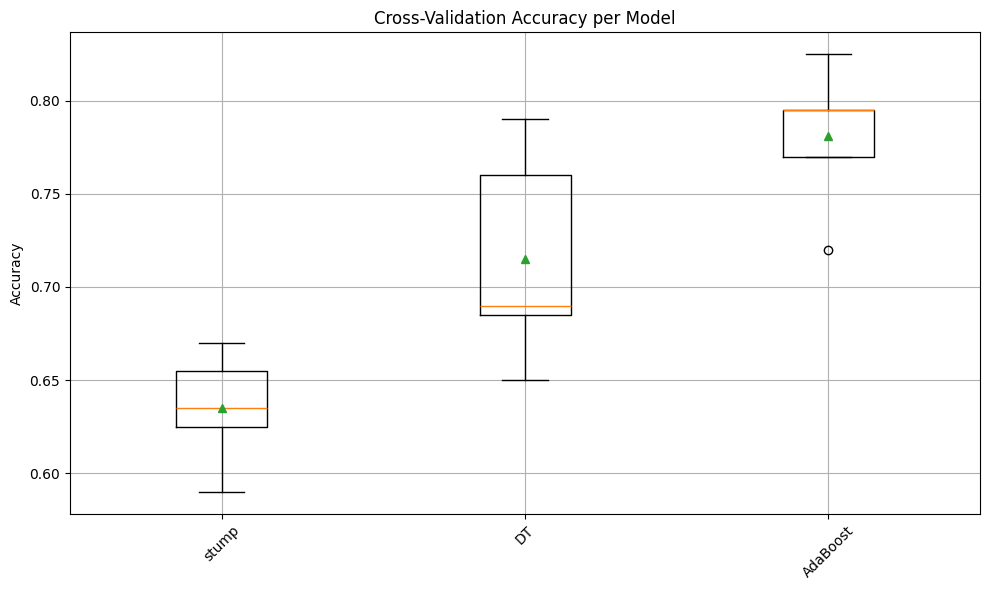

Classification Report - stump:

              precision    recall  f1-score   support

     Class 0       0.56      0.92      0.70       146
     Class 1       0.81      0.31      0.44       154

    accuracy                           0.61       300
   macro avg       0.68      0.61      0.57       300
weighted avg       0.69      0.61      0.57       300



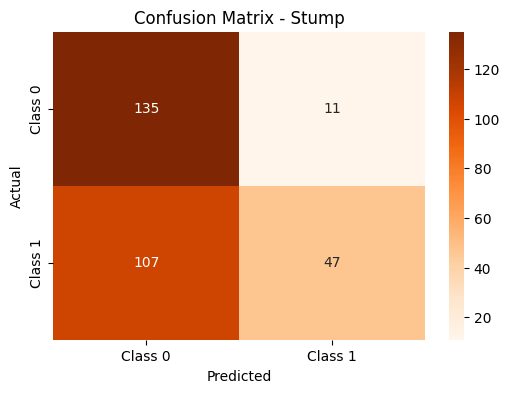

Classification Report - DT:

              precision    recall  f1-score   support

     Class 0       0.60      0.86      0.71       146
     Class 1       0.77      0.47      0.58       154

    accuracy                           0.66       300
   macro avg       0.69      0.66      0.65       300
weighted avg       0.69      0.66      0.64       300



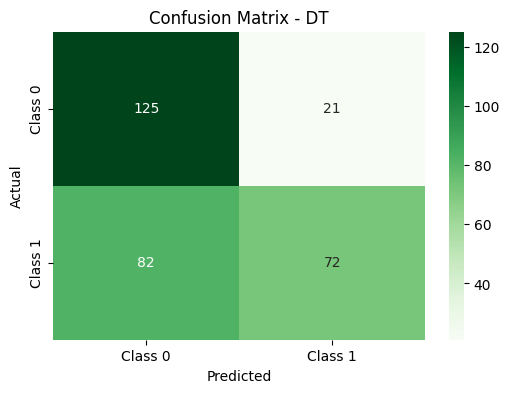

Classification Report - AdaBoost:

              precision    recall  f1-score   support

     Class 0       0.75      0.82      0.78       146
     Class 1       0.81      0.73      0.77       154

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



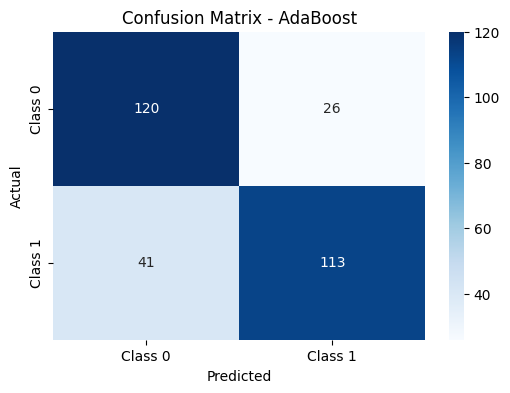

In [7]:
stump = DecisionTreeClassifier(max_depth=1)
simple_model = DecisionTreeClassifier(max_depth=5, random_state=42)
boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}
cv_results["stump"] = evaluate_model_cv("Stump", stump, X, y)
cv_results["DT"] = evaluate_model_cv("Decision Tree", simple_model, X, y)
cv_results["AdaBoost"] = evaluate_model_cv("AdaBoost", boost, X, y)

plt.figure(figsize=(10, 6))
plt.boxplot(cv_results.values(), labels=cv_results.keys(), showmeans=True)
plt.title("Cross-Validation Accuracy per Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# re-fit & predict
stump.fit(X_train, y_train)
simple_model.fit(X_train, y_train)
boost.fit(X_train, y_train)

y_pred_stump = stump.predict(X_test)
y_pred_simple = simple_model.predict(X_test)
y_pred_boost = boost.predict(X_test)

class_names = [f"Class {i}" for i in np.unique(y)]

print("Classification Report - stump:\n")
print(classification_report(y_test, y_pred_stump, target_names=class_names))
cm = confusion_matrix(y_test, y_pred_stump)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Oranges", xticklabels=class_names, yticklabels=class_names, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Stump")
plt.show()

print("Classification Report - DT:\n")
print(classification_report(y_test, y_pred_simple, target_names=class_names))
cm = confusion_matrix(y_test, y_pred_simple)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Greens", xticklabels=class_names, yticklabels=class_names, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - DT")
plt.show()

print("Classification Report - AdaBoost:\n")
print(classification_report(y_test, y_pred_boost, target_names=class_names))
cm = confusion_matrix(y_test, y_pred_boost)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=class_names, yticklabels=class_names, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AdaBoost")
plt.show()


##  
## 📊 Visualization
##  
- Decision boundaries

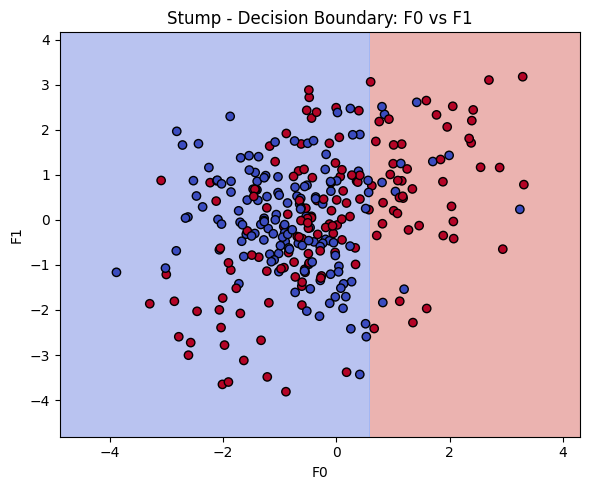

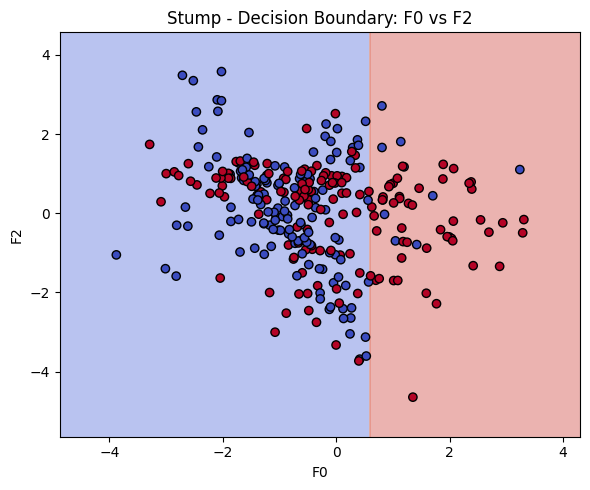

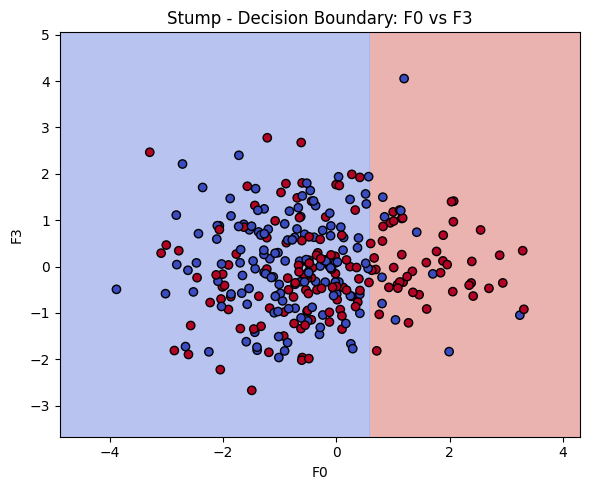

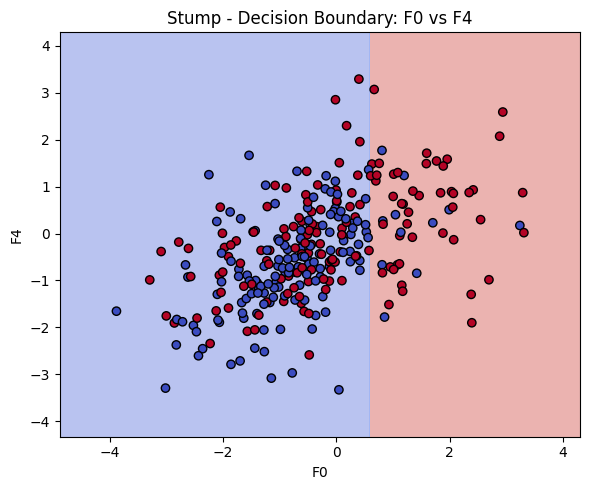

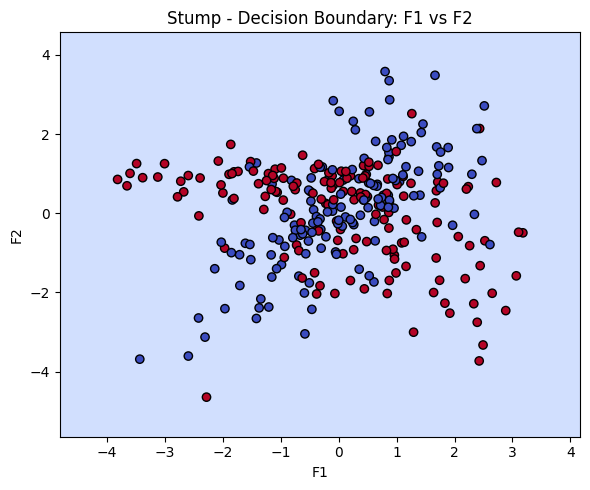

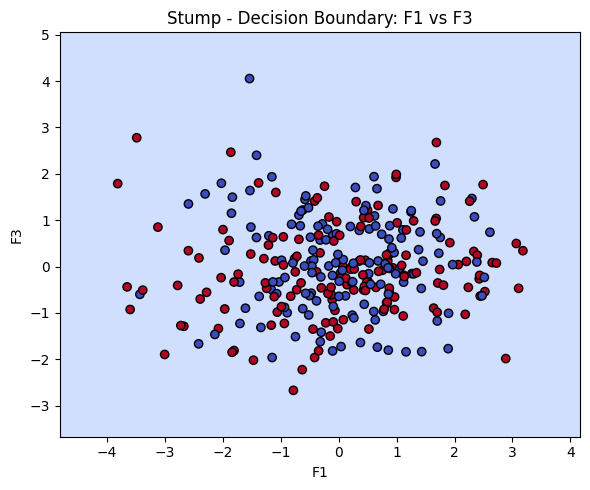

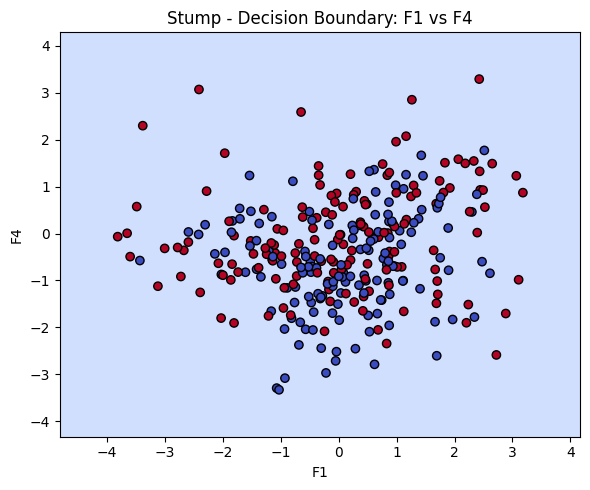

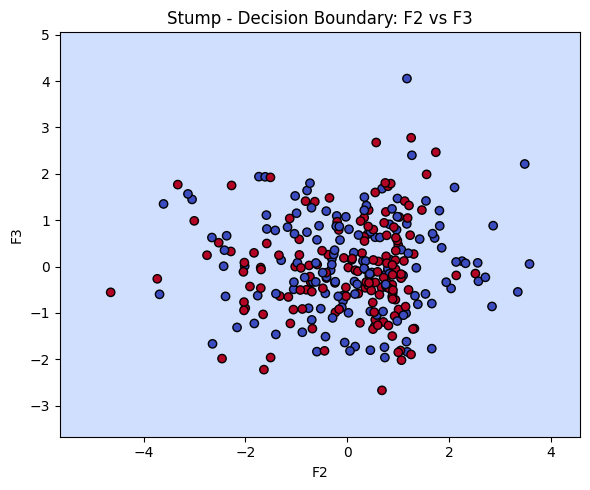

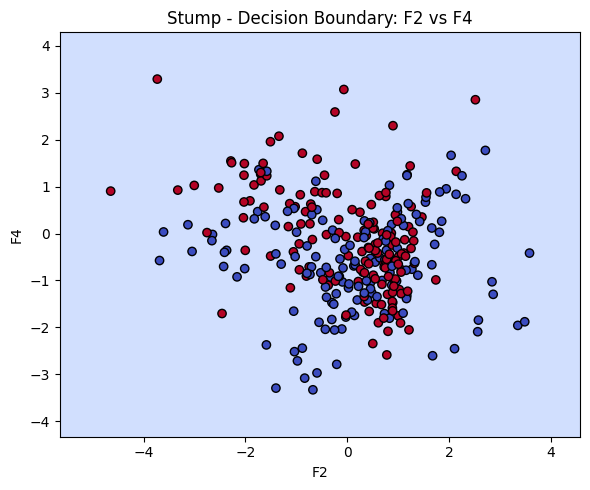

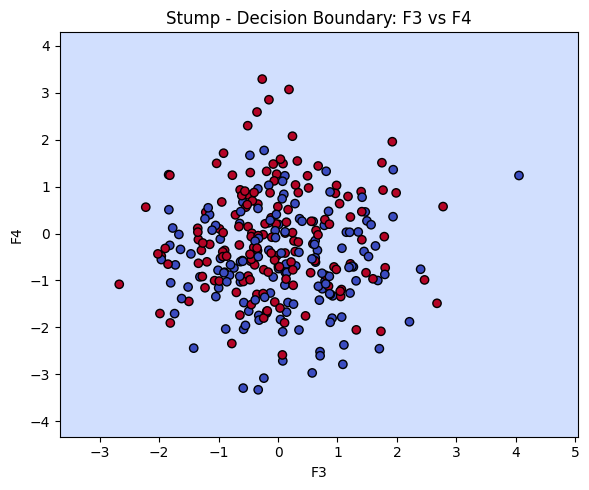

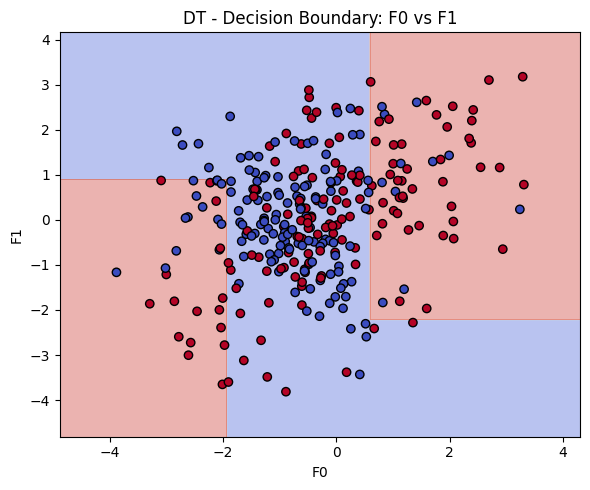

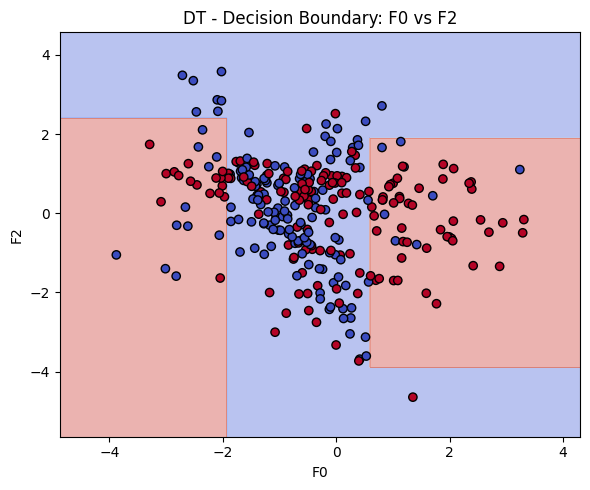

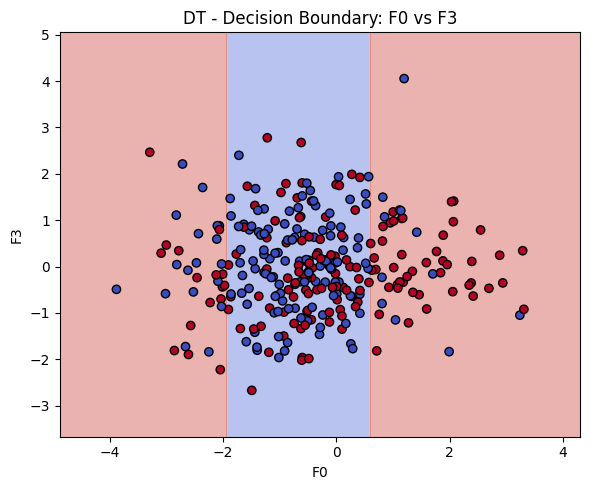

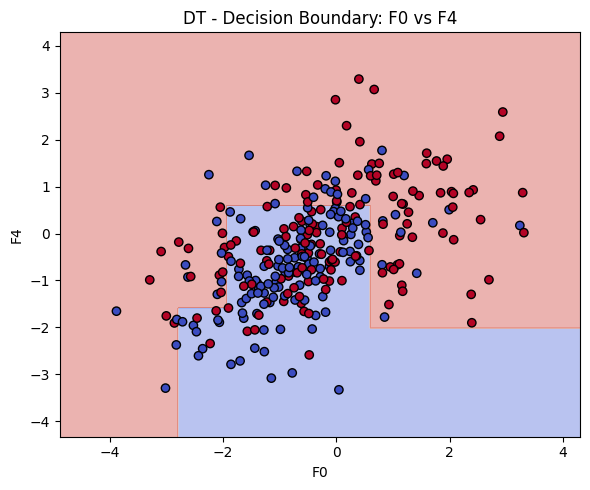

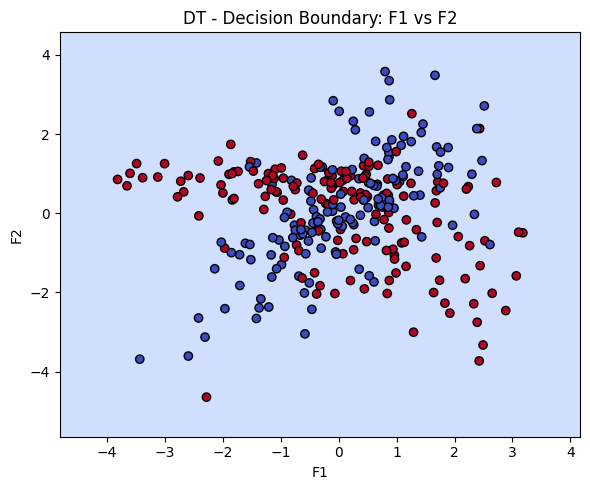

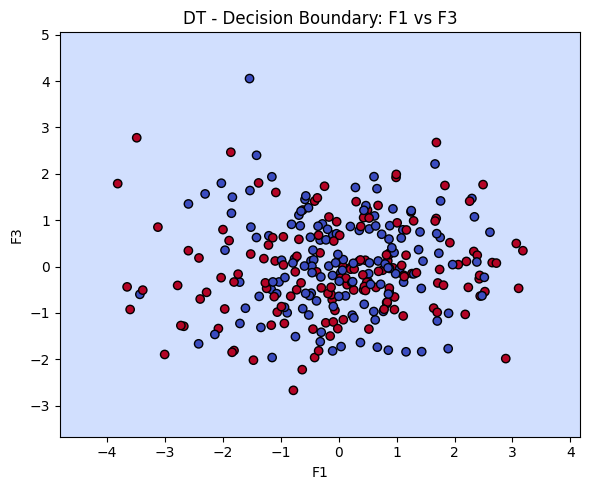

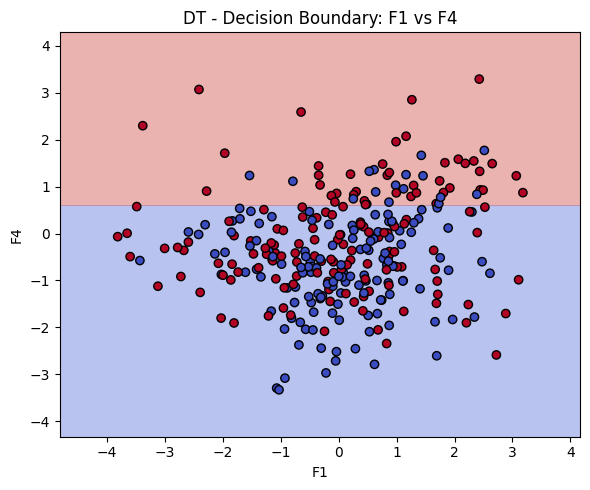

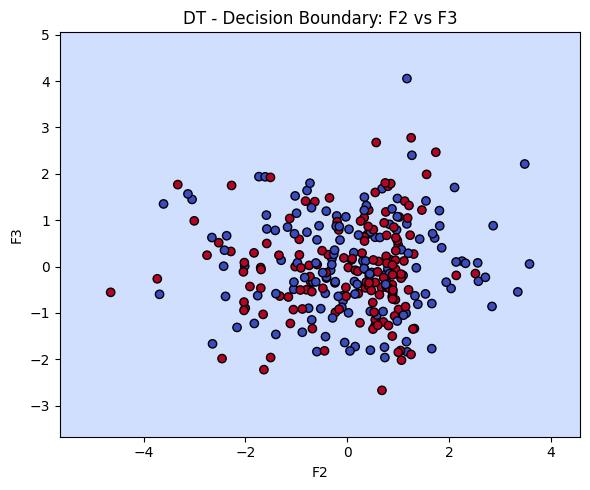

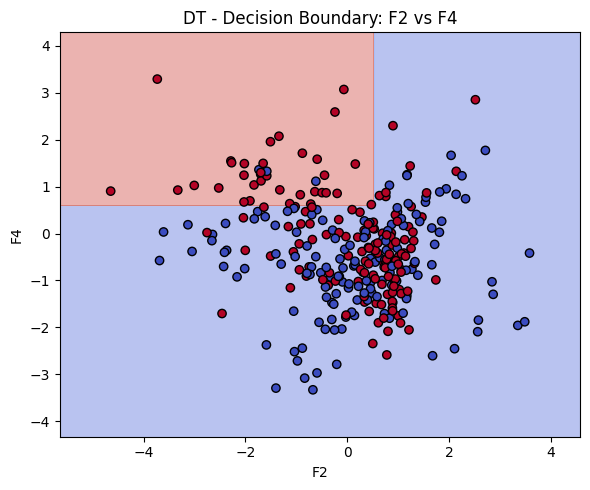

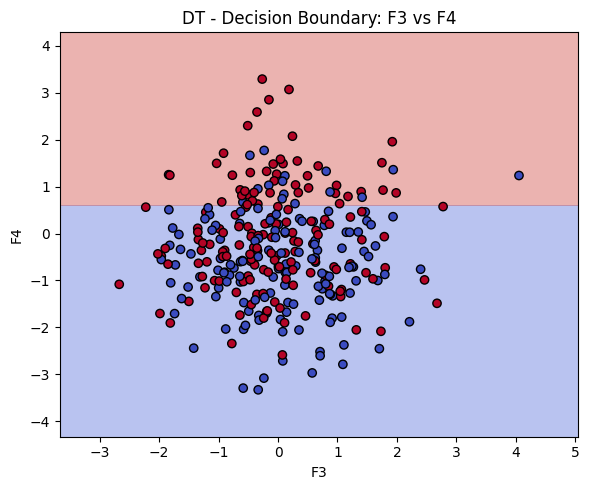

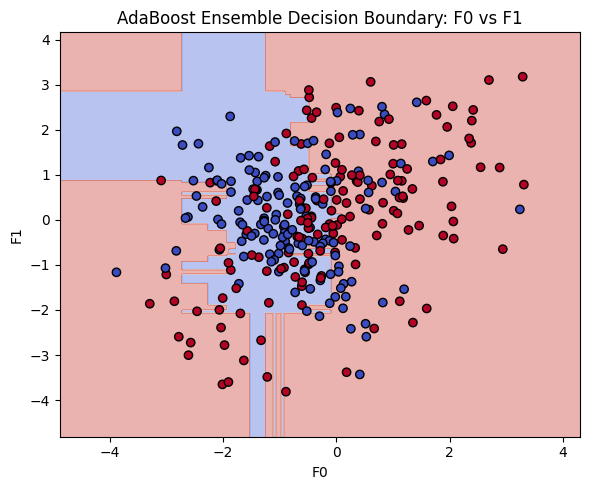

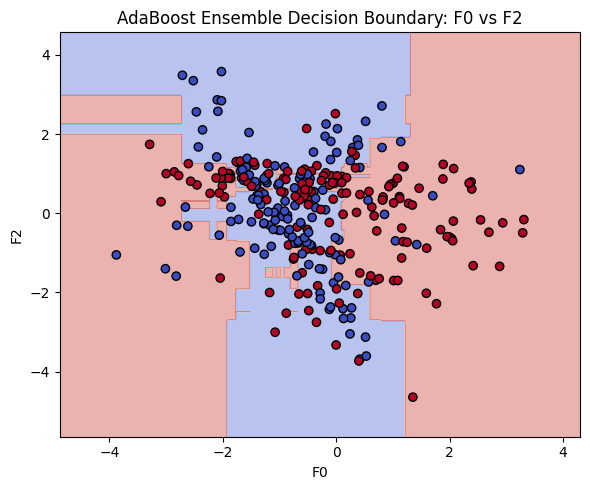

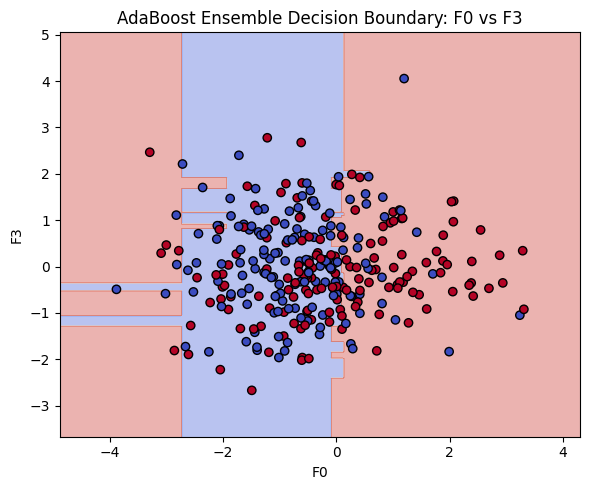

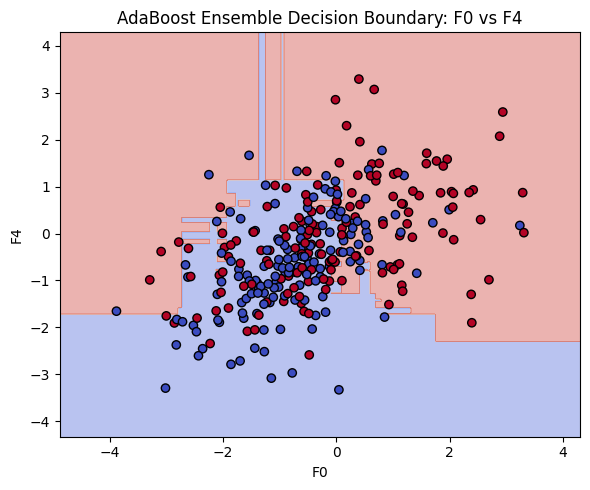

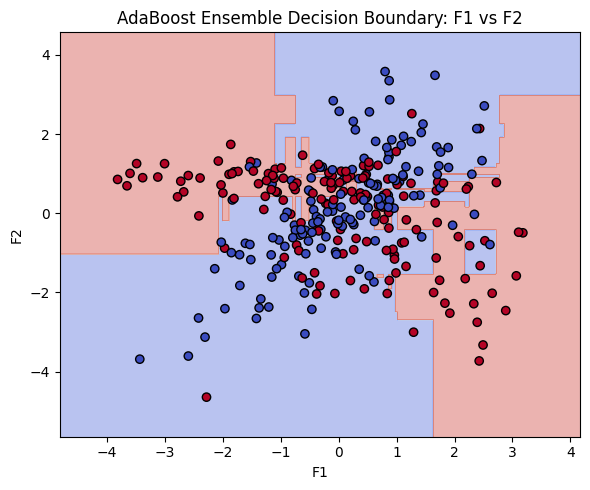

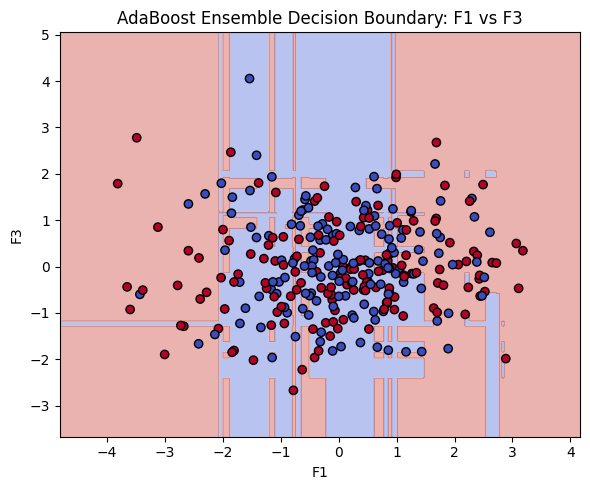

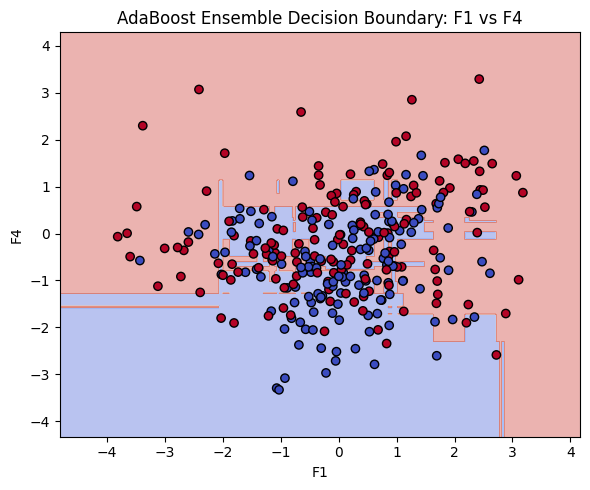

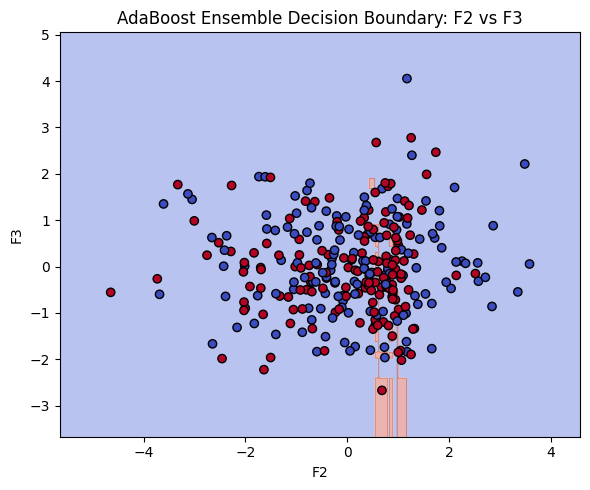

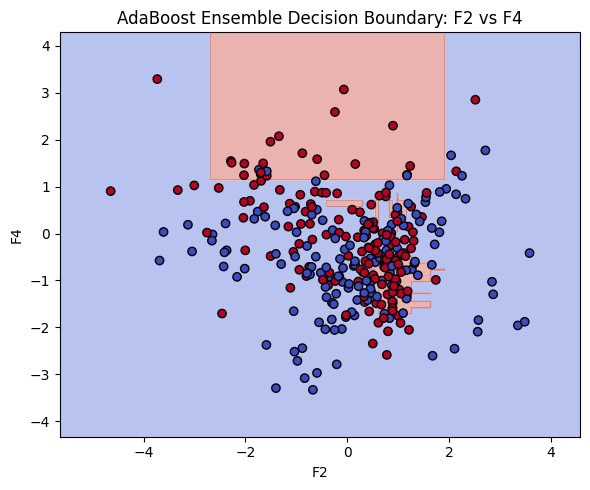

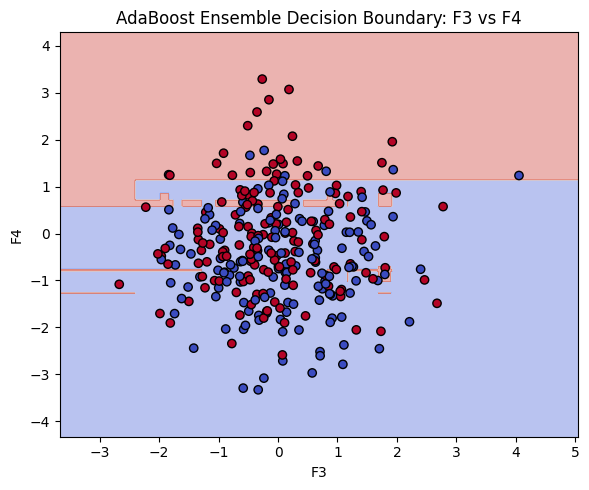

In [8]:
def plot_decision_boundaries_for_pairs(model, X, y, title, feature_names=None, fixed_vals=None ):
    n_features = X.shape[1]
    pairs = list(itertools.combinations(range(n_features), 2))

    if feature_names is None:
        feature_names = [f"F{i}" for i in range(n_features)]

    if fixed_vals is None:
        fixed_vals = X.mean(axis=0)

    for f1, f2 in pairs:
        h = .02
        x_min, x_max = X[:, f1].min() - 1, X[:, f1].max() + 1
        y_min, y_max = X[:, f2].min() - 1, X[:, f2].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # Build full input with fixed features
        X_grid = np.tile(fixed_vals, (xx.ravel().shape[0], 1))
        X_grid[:, f1] = xx.ravel()
        X_grid[:, f2] = yy.ravel()
        Z = model.predict(X_grid).reshape(xx.shape)
        plt.figure(figsize=(6, 5))
        plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
        plt.scatter(X[:, f1], X[:, f2], c=y, cmap='coolwarm', edgecolor='k')
        plt.xlabel(feature_names[f1])
        plt.ylabel(feature_names[f2])
        plt.title(f"{title}: {feature_names[f1]} vs {feature_names[f2]}")
        plt.tight_layout()
        plt.show()


plot_decision_boundaries_for_pairs(stump, X_test, y_test, "Stump - Decision Boundary")
plot_decision_boundaries_for_pairs(simple_model, X_test, y_test, "DT - Decision Boundary")
plot_decision_boundaries_for_pairs(boost, X_test, y_test, "AdaBoost Ensemble Decision Boundary")

## 🚀 XGBoost on Synthetic Data

> **AdaBoost vs. XGBoost**

| Feature                  | **AdaBoost**                                           | **XGBoost**                                                       |
|--------------------------|--------------------------------------------------------|-------------------------------------------------------------------|
| **Core Idea**                | Focuses on errors by reweighting misclassified samples | Uses gradient of loss to fit new trees (gradient boosting)        |
| **Base Learners**            | Typically shallow trees or stumps                      | Typically shallow trees (depth 3–6), but more flexible            |
| **Boosting Method**          | Reweights data samples                                 | Optimizes a differentiable loss function                          |
| **Regularization**           | None (or very basic)                                   | Built-in L1/L2 regularization to avoid overfitting                |
| **Speed**                    | Simple, slower to converge                             | Highly optimized and fast (parallelized, histogram-based)         |
| **Missing Value Handling**   | Not supported inherently                               | Automatically handles missing values                              |
| **Customization**            | Fewer knobs to tweak                                   | Highly tunable: learning rate, subsampling, colsampling, etc.     |
| **Performance**              | Good for clean or small datasets                       | Often state-of-the-art on structured/tabular data                 |





XGB                  Mean Acc: 0.775 | Std: 0.027


<ipython-input-20-1e11f8691203>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cv_results.values(), labels=cv_results.keys(), showmeans=True)


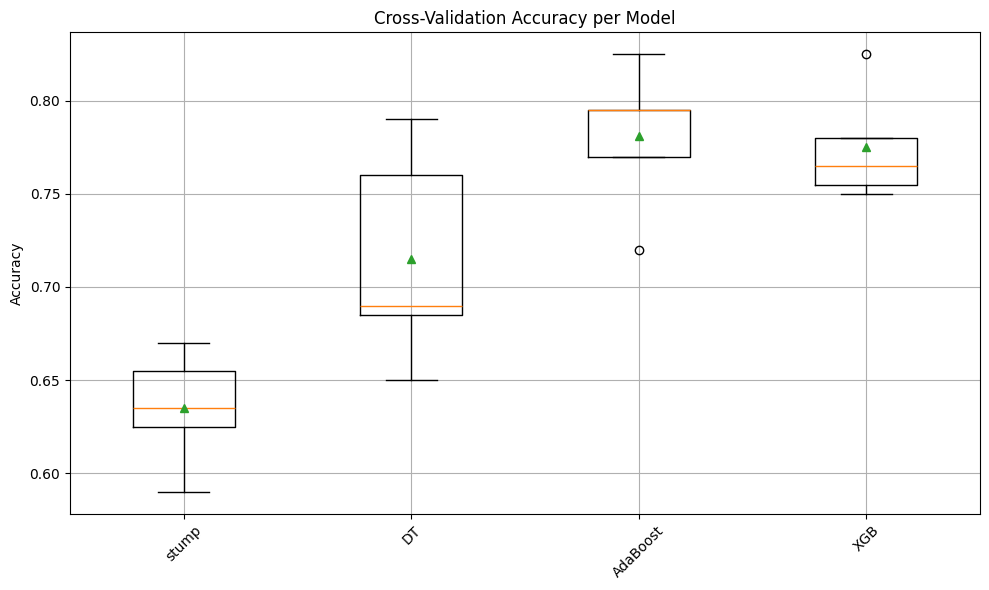


Classification Report - XGB:
              precision    recall  f1-score   support

     Class 0       0.72      0.83      0.77       146
     Class 1       0.81      0.70      0.75       154

    accuracy                           0.76       300
   macro avg       0.77      0.77      0.76       300
weighted avg       0.77      0.76      0.76       300



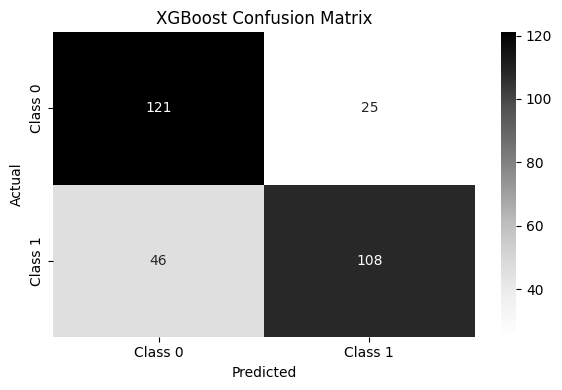

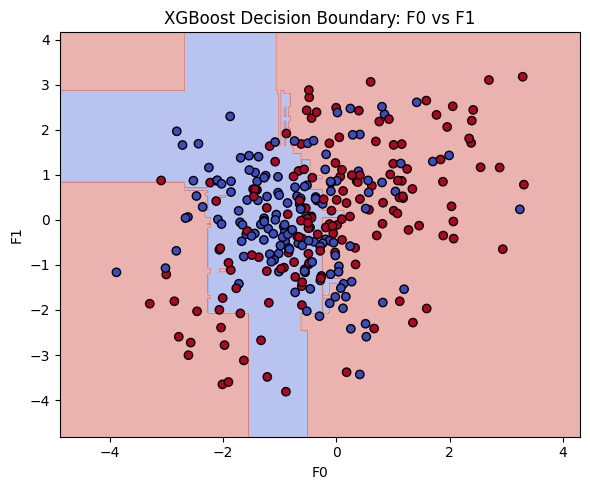

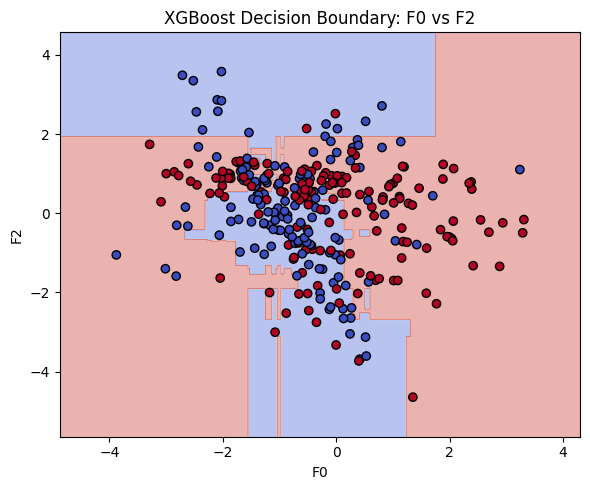

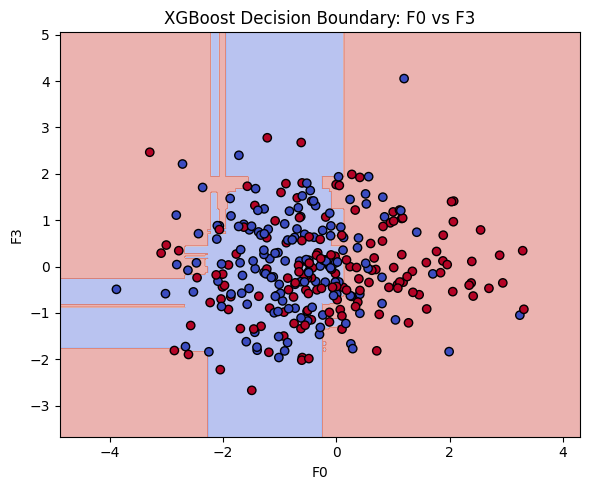

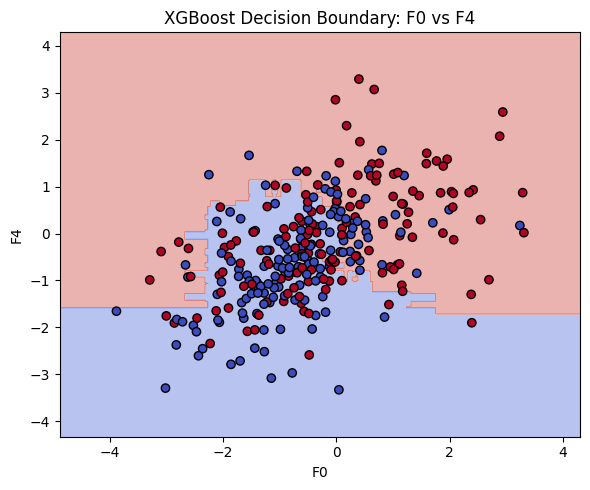

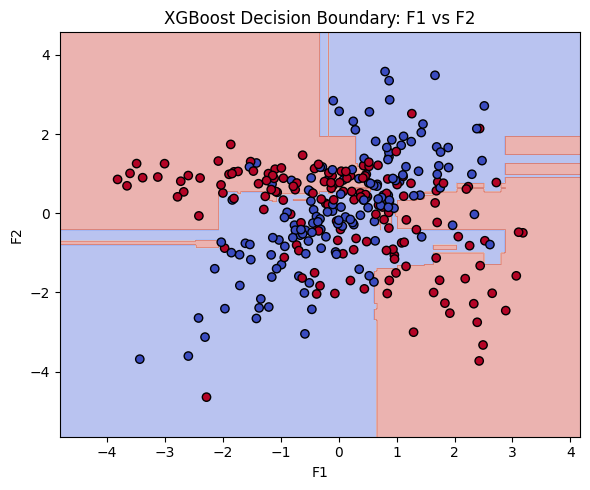

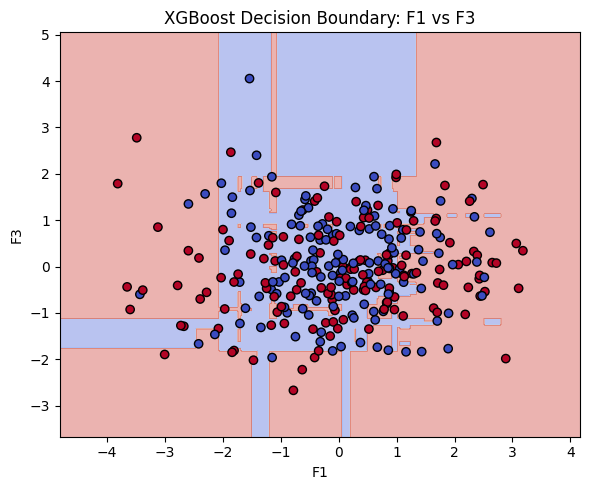

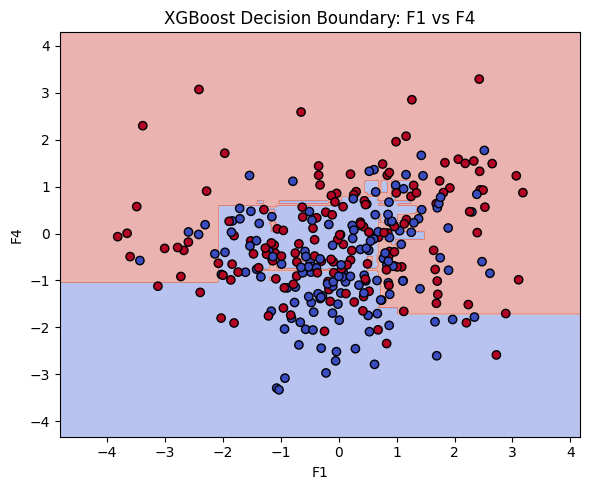

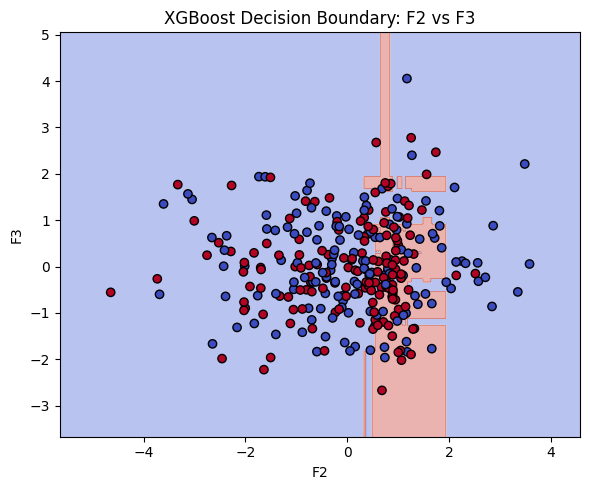

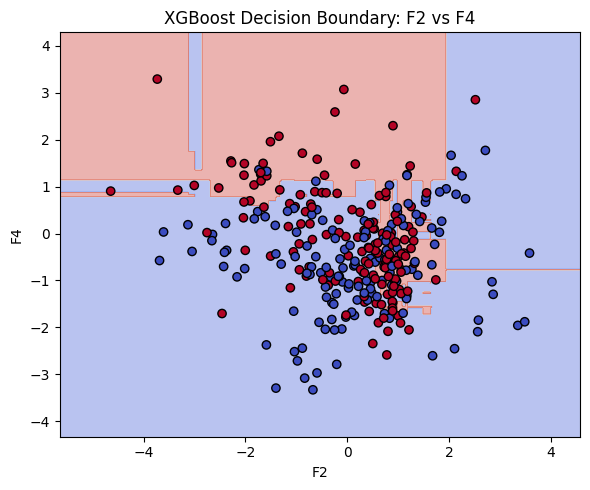

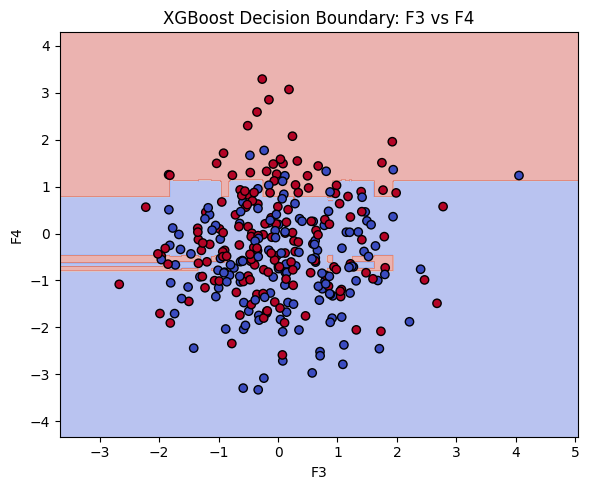

In [20]:
xgb= XGBClassifier(n_estimators=100, max_depth=5)
cv_results["XGB"] = evaluate_model_cv("XGB", xgb, X, y)

plt.figure(figsize=(10, 6))
plt.boxplot(cv_results.values(), labels=cv_results.keys(), showmeans=True)
plt.title("Cross-Validation Accuracy per Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Train on full training set
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

class_names = [f"Class {i}" for i in np.unique(y)]

print("\nClassification Report - XGB:")
print(classification_report(y_test, y_pred_xgb, target_names=class_names))

cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Greys", fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.tight_layout()
plt.show()


plot_decision_boundaries_for_pairs(xgb, X_test, y_test, "XGBoost Decision Boundary")


### 📈 Learning Curve
- **Log Loss (Logistic Loss, Cross-Entropy)**:
  - LogLoss(y,p'​)=−[y⋅log(p'​)+(1−y)⋅log(1−p'​)]
    - y - true label
    - p' - predicated probability of class 1
  - a probabilistic loss function which measures how close the predicted probabilities are to the true labels. Penalizes confident wrong answers heavily.
- **Classification Error** = (number of incorrect predictions) / (total predictions)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:03:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


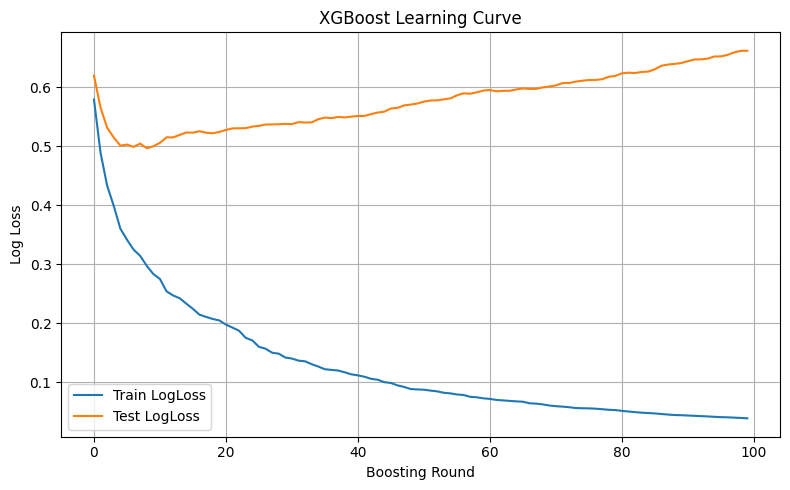

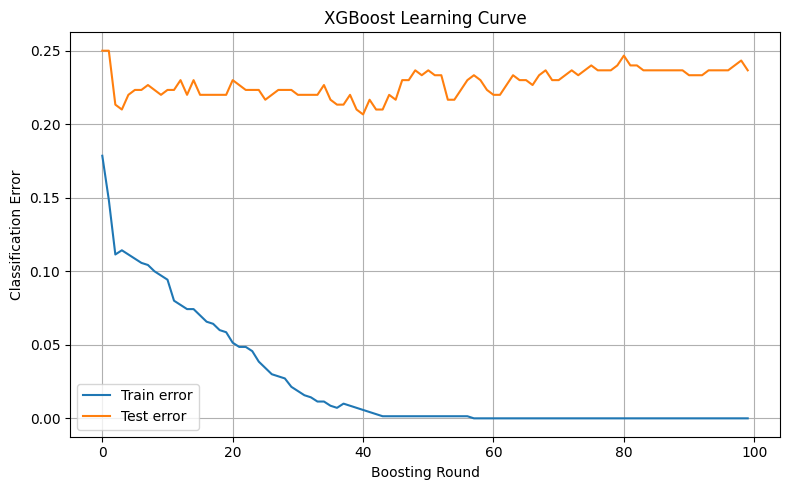

In [23]:
model = XGBClassifier(n_estimators=100, eval_metric=["error", "logloss"], use_label_encoder=False)
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False
)

results = model.evals_result()

plt.figure(figsize=(8, 5))
plt.plot(results["validation_0"]["logloss"], label="Train LogLoss")
plt.plot(results["validation_1"]["logloss"], label="Test LogLoss")
plt.xlabel("Boosting Round")
plt.ylabel("Log Loss")
plt.title("XGBoost Learning Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(results["validation_0"]["error"], label="Train error")
plt.plot(results["validation_1"]["error"], label="Test error")
plt.xlabel("Boosting Round")
plt.ylabel("Classification Error")
plt.title("XGBoost Learning Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



[0]	validation_0-logloss:0.57957	validation_1-logloss:0.62028
[1]	validation_0-logloss:0.48929	validation_1-logloss:0.56596
[2]	validation_0-logloss:0.43331	validation_1-logloss:0.53161
[3]	validation_0-logloss:0.39909	validation_1-logloss:0.51503
[4]	validation_0-logloss:0.36051	validation_1-logloss:0.50126
[5]	validation_0-logloss:0.34175	validation_1-logloss:0.50308
[6]	validation_0-logloss:0.32492	validation_1-logloss:0.49916
[7]	validation_0-logloss:0.31425	validation_1-logloss:0.50475
[8]	validation_0-logloss:0.29733	validation_1-logloss:0.49693


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:59:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	validation_0-logloss:0.28339	validation_1-logloss:0.50018
[10]	validation_0-logloss:0.27500	validation_1-logloss:0.50606
[11]	validation_0-logloss:0.25406	validation_1-logloss:0.51539
[12]	validation_0-logloss:0.24703	validation_1-logloss:0.51527
[13]	validation_0-logloss:0.24228	validation_1-logloss:0.51956
[14]	validation_0-logloss:0.23314	validation_1-logloss:0.52353
[15]	validation_0-logloss:0.22424	validation_1-logloss:0.52338
[16]	validation_0-logloss:0.21441	validation_1-logloss:0.52571
[17]	validation_0-logloss:0.21063	validation_1-logloss:0.52321
[18]	validation_0-logloss:0.20718	validation_1-logloss:0.52234
best iteration: 8
best score: 0.4969272481898467


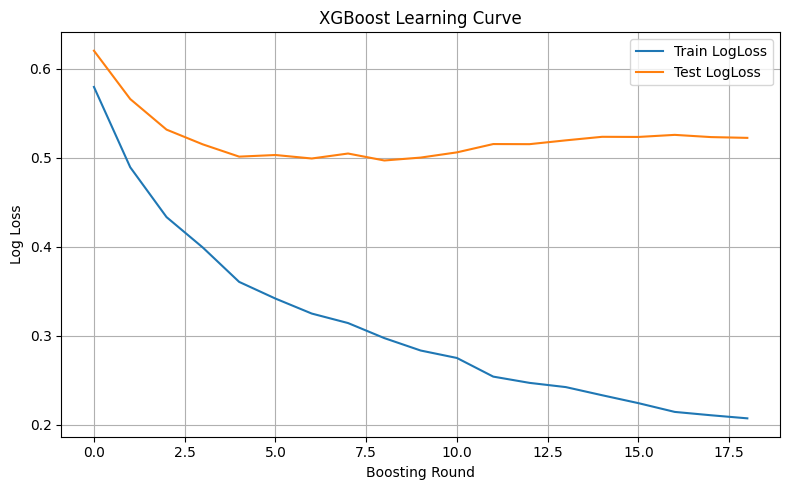


Classification Report - XGB:
              precision    recall  f1-score   support

     Class 0       0.75      0.82      0.78       146
     Class 1       0.81      0.74      0.77       154

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



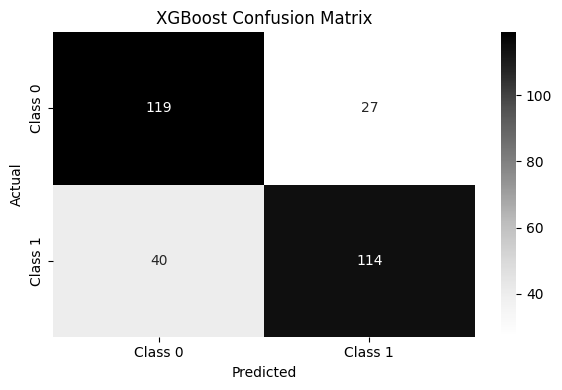

In [21]:
model = XGBClassifier(n_estimators=100, eval_metric="logloss",  early_stopping_rounds=10, use_label_encoder=False)
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=True
)

print(f"best iteration: { model.best_iteration}")
print(f"best score: {model.best_score}")

results = model.evals_result()

plt.figure(figsize=(8, 5))
plt.plot(results["validation_0"]["logloss"], label="Train LogLoss")
plt.plot(results["validation_1"]["logloss"], label="Test LogLoss")
plt.xlabel("Boosting Round")
plt.ylabel("Log Loss")
plt.title("XGBoost Learning Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


model_pred = model.predict(X_test)

class_names = [f"Class {i}" for i in np.unique(y)]

print("\nClassification Report - XGB:")
print(classification_report(y_test, model_pred, target_names=class_names))

cm = confusion_matrix(y_test, model_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Greys", fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.tight_layout()
plt.show()


